<a href="https://colab.research.google.com/github/mohitsaini65/Cotton-Plant-Disease-Prediction/blob/main/Cotton_Plant_Disease_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = "/content/drive/MyDrive/Colab Notebooks/Cotton-Plant-Disease-Dataset/data/train"
test_path  = "/content/drive/MyDrive/Colab Notebooks/Cotton-Plant-Disease-Dataset/data/test"

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
inception = InceptionV3(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top=False
)

# Freeze pretrained layers
for layer in inception.layers:
    layer.trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
folders = glob(train_path + "/*")

x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,007,588 (83.95 MB)

 Trainable params: 204,804 (800.02 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 467s 8s/step - accuracy: 0.7790 - loss: 1.7827 - val_accuracy: 0.8333 - val_loss: 0.8489
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 36s 593ms/step - accuracy: 0.8882 - loss: 0.5230 - val_accuracy: 0.8889 - val_loss: 0.3897
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 577ms/step - accuracy: 0.9139 - loss: 0.4236 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 34s 560ms/step - accuracy: 0.9285 - loss: 0.4706 - val_accuracy: 0.8889 - val_loss: 0.3085
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 38s 618ms/step - accuracy: 0.9216 - loss: 0.4373 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 36s 588ms/step - accuracy: 0.9294 - loss: 0.4949 - val_accuracy: 0.8889 - val_loss: 0.4462
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 35s 567ms/step - accuracy: 0.9372 - loss: 0.3920 - val_accuracy: 0.9444 - val_loss: 0.1749
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 36s 583ms/step - accuracy: 0.9320 - loss: 0.4662 - val_accura

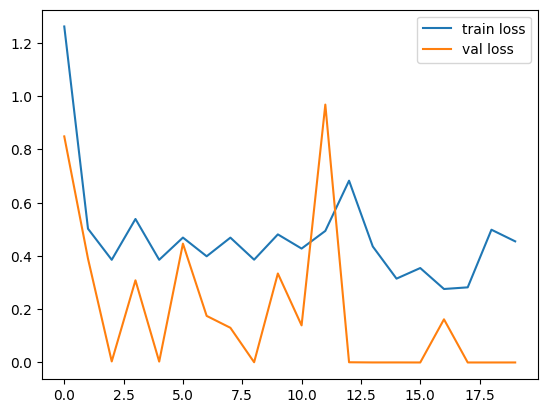

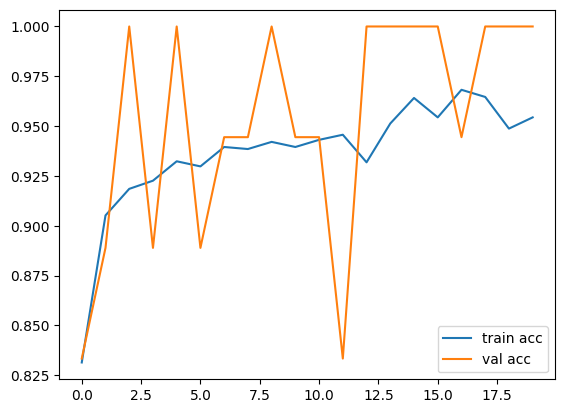

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/model_inception_v3_cotton.h5")

In [ ]:
test_loss, test_acc = model.evaluate(test_set)
print("Test Accuracy:", test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 5.6427e-05
Test Accuracy: 1.0


In [ ]:
y_pred = model.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)

print(y_pred_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
[0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]


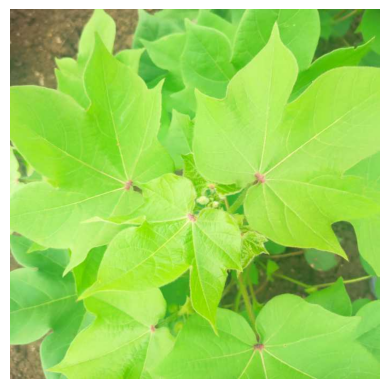

In [ ]:
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/Colab Notebooks/Cotton-Plant-Disease-Dataset/data/val/fresh cotton plant/dsd (142)_iaip.jpg"

img = plt.imread(img_path)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

img_path = "/content/drive/MyDrive/Colab Notebooks/Cotton-Plant-Disease-Dataset/data/val/fresh cotton plant/dsd (142)_iaip.jpg"

img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

pred = model.predict(x)

class_names = list(training_set.class_indices.keys())
print("Predicted class:", class_names[np.argmax(pred)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted class: fresh cotton plant


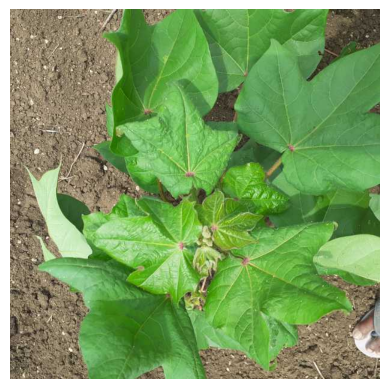

In [ ]:
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/Colab Notebooks/Cotton-Plant-Disease-Dataset/data/val/diseased cotton plant/dd (10)_iaip.jpg"

img = plt.imread(img_path)
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image

img_path = "/content/drive/MyDrive/Colab Notebooks/Cotton-Plant-Disease-Dataset/data/val/diseased cotton plant/dd (10)_iaip.jpg"

img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

pred = model.predict(x)

class_names = list(training_set.class_indices.keys())
print("Predicted class:", class_names[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted class: diseased cotton plant


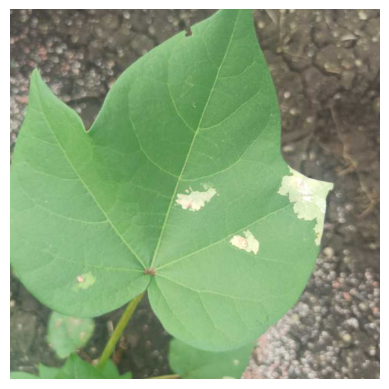

In [ ]:
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/Colab Notebooks/Cotton-Plant-Disease-Dataset/data/val/diseased cotton leaf/dis_leaf (114)_iaip.jpg"

img = plt.imread(img_path)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

img_path = "/content/drive/MyDrive/Colab Notebooks/Cotton-Plant-Disease-Dataset/data/val/diseased cotton leaf/dis_leaf (114)_iaip.jpg"

img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

pred = model.predict(x)

class_names = list(training_set.class_indices.keys())
print("Predicted class:", class_names[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted class: fresh cotton leaf
